In [1]:
%pip install numpy pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('dataset/spam.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

### 1 Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
df.drop(columns=df.columns[2:], inplace=True)

In [8]:
df.sample(5)

,v1,v2
848,ham,Yeah there's barely enough room for the two of...
4144,ham,Lol I would but despite these cramps I like be...
2807,ham,Yes princess! I want to catch you with my big ...
3826,spam,Congratulations U can claim 2 VIP row A Ticket...
5126,ham,"To the wonderful Okors, have a great month. We..."


In [9]:
##renaming the cols
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [10]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])


In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df.drop_duplicates(inplace=True)

### 2. EDA

In [16]:
%pip install matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline



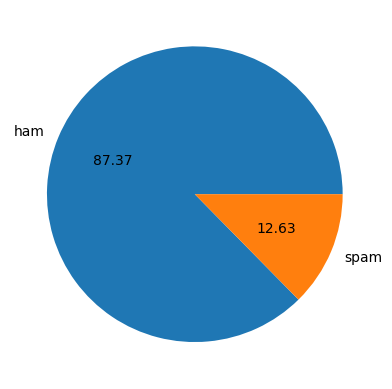

In [18]:
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()


In [19]:
#data is imbalanced

In [20]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pytho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pytho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
num_col = ['num_characters', 'num_words', 'num_sentences']
df[num_col].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target'] == 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [29]:
df[df['target'] == 1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

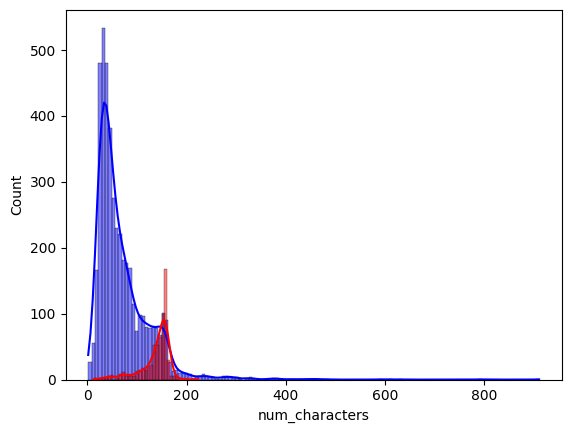

In [31]:
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', kde=True)
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', kde=True)

<Axes: xlabel='num_words', ylabel='Count'>

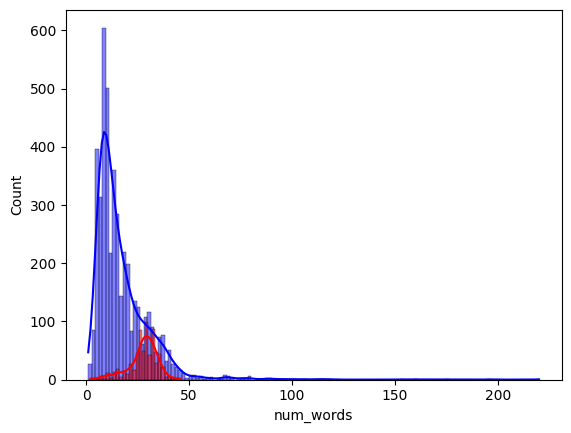

In [32]:
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', kde=True)
sns.histplot(df[df['target'] == 1]['num_words'], color='red', kde=True)

<Axes: xlabel='num_sentences', ylabel='Count'>

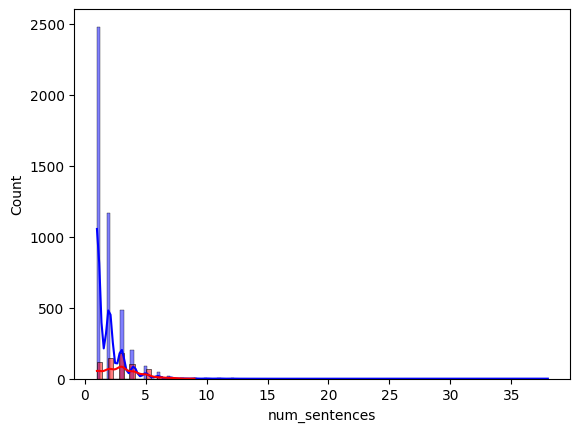

In [33]:
sns.histplot(df[df['target'] == 0]['num_sentences'], color='blue', kde=True)
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red', kde=True)

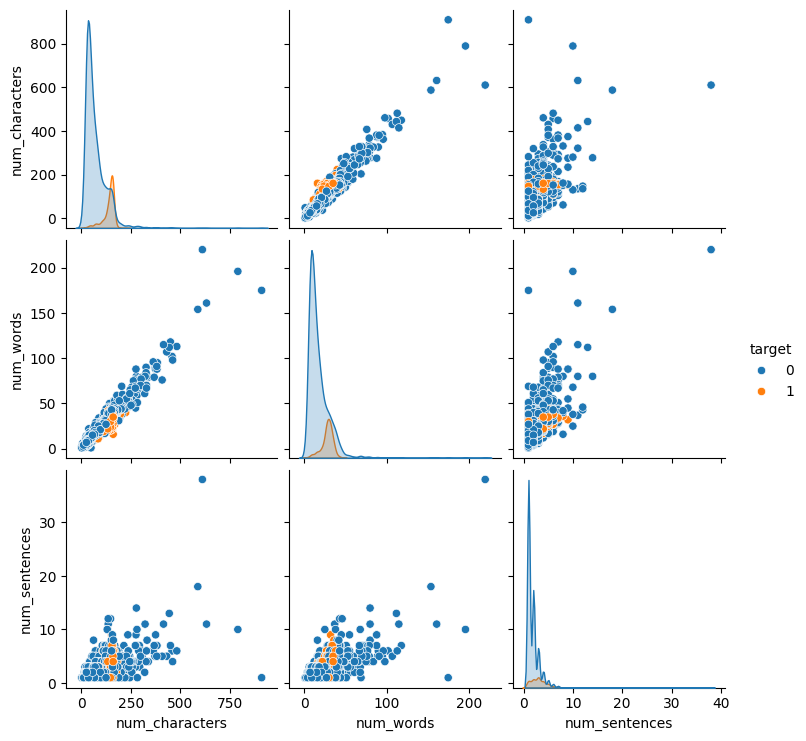

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

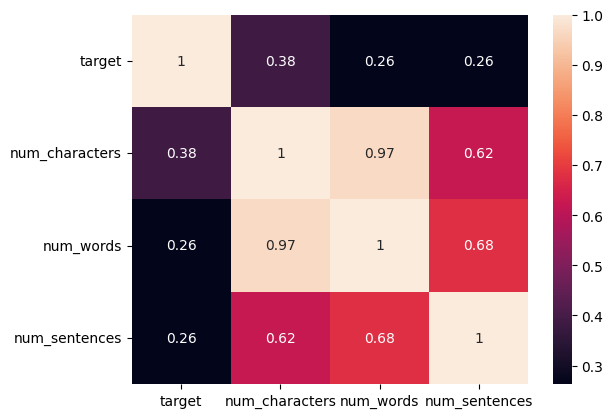

In [35]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


### 3. Data preprocessing
- lower case
- tokenization
- remove special characters
- remove stop words and punctuations
- stemming 

In [36]:
# Download stopwords
nltk.download('stopwords')

# Import libraries
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Create preprocessing function
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # 1. Lowercase
    text = nltk.word_tokenize(text)  # 2. Tokenization
    
    # 3. Remove special characters
    y = [i for i in text if i.isalnum()]
    
    # 4. Remove stopwords & punctuation
    text = [i for i in y if i not in stopwords.words('english')]
    
    # 5. Stemming
    return " ".join([ps.stem(i) for i in text])

# Apply to dataset
df['transformed_text'] = df['text'].apply(transform_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pytho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [37]:
df['transformed_text'] = df['text'].apply(transform_text)   

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
%pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ba/66/04e0f33135d7b8d76bd1721c1c7a42a0cbe748ff48588ab6ea01316e1ab0/wordcloud-1.9.5-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/307.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/307.3 kB ? eta -:--:--
   ----- --------------------------------- 41.0/307.3 kB 487.6 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/307.3 kB 544.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/307.3 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/307.3 kB 476.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/307.3 kB 476.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/307.3 kB 476.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/307.3 kB 476.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/307.3 kB 476.3 kB/s eta 0:00:01
   --


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from wordcloud import WordCloud
wc =WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [45]:
spam_wc =  wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))  

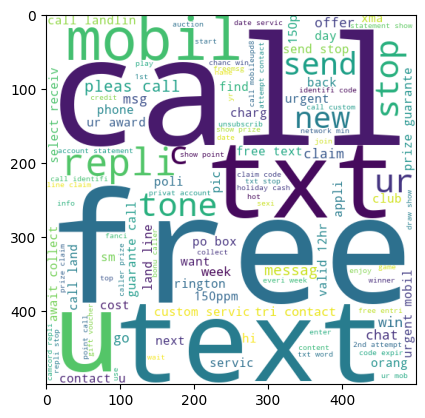

In [47]:
plt.imshow(spam_wc)

In [48]:
ham_wc =  wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))  

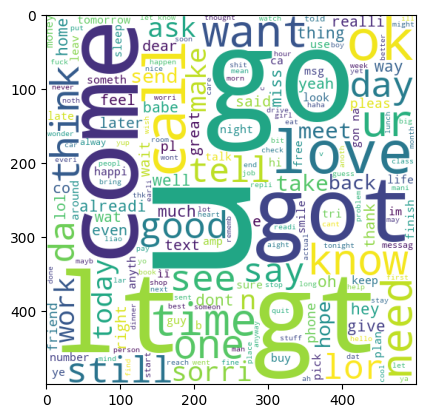

In [50]:
plt.imshow(ham_wc)

In [51]:
from collections import Counter

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

top_30_spam = Counter(spam_corpus).most_common(30)
top_30_ham = Counter(ham_corpus).most_common(30)

print("Top 30 Spam Words:")
print(top_30_spam)

print("\nTop 30 Ham Words:")
print(top_30_ham)


Top 30 Spam Words:
[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('week', 49), ('win', 48), ('c', 45), ('collect', 45), ('min', 45)]

Top 30 Ham Words:
[('u', 883), ('go', 404), ('get', 349), ('gt', 288), ('lt', 287), ('2', 284), ('come', 275), ('got', 236), ('know', 236), ('like', 234), ('call', 233), ('time', 219), ('ok', 217), ('love', 216), ('good', 213), ('want', 208), ('ur', 197), ('day', 190), ('need', 170), ('one', 165), ('lor', 159), ('4', 156), ('home', 152), ('think', 149), ('see', 147), ('take', 143), ('still', 143), ('da', 142), ('tell', 133), ('make', 129)]
